<a href="https://colab.research.google.com/github/Dly27/oscar-predictor/blob/main/oscar_winner_predictor_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package installation

In [1]:
if (!require("caret")) install.packages("caret", repos = "http://cran.rstudio.com/")
if (!require("scales")) install.packages("scales", repos = "http://cran.rstudio.com/")
if (!require("car")) install.packages("car", repos = "http://cran.rstudio.com/")
if (!require("pROC")) install.packages("pROC", repos = "http://cran.rstudio.com/")


Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: scales

Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModel

# Import libraries

In [12]:
library(pROC)
library(car)
library(scales)
library(caret)

# Data preparation

In [3]:
# Load data
data <- read.csv("/content/oscars.csv", header = TRUE)

# Remove the prediction set
train_test_data <- data[-(1:10), ]

# Split data into train and test sets
set.seed(123)
train_test_index <- createDataPartition(train_test_data$Ch, p = 0.8, list = FALSE)
train_data <- train_test_data[train_test_index, ]
test_data <- train_test_data[-train_test_index, ]

# Preprocess training data
train_data$Ch <- ifelse(train_data$Ch == 1, 1, 0)  # Convert Ch to binary
train_data$WR <- train_data$WR / 10                # Rescale WR
train_data$Ebert <- train_data$Ebert / 4          # Rescale Ebert

# Rescale some columns
for (col in c("Nom", "Length", "Days")) {
  scaling_params <- range(train_data[[col]])
  train_data[[col]] <- scales::rescale(train_data[[col]])

# Rescale test data
  test_data[[col]] <- (test_data[[col]] - scaling_params[1]) /
                      (scaling_params[2] - scaling_params[1])
}

# Preprocess the test data
test_data$Ch <- ifelse(test_data$Ch == 1, 1, 0)
test_data$WR <- test_data$WR / 10
test_data$Ebert <- test_data$Ebert / 4


# Fit full model

In [4]:
full_model <- glm(Ch ~ . -Year -Name -Pic -Anf, data = train_data, family = binomial )
summary(full_model)


Call:
glm(formula = Ch ~ . - Year - Name - Pic - Anf, family = binomial, 
    data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -10.93047    3.99967  -2.733  0.00628 ** 
Nom            1.67448    5.65329   0.296  0.76708    
Dir            1.72168    0.81968   2.100  0.03569 *  
Aml           -0.49533    0.62685  -0.790  0.42942    
Afl            0.03678    0.72102   0.051  0.95932    
Ams            0.40548    0.57710   0.703  0.48230    
Afs           -0.28542    0.65734  -0.434  0.66414    
Scr            0.88444    0.81614   1.084  0.27851    
Cin            0.22110    0.68120   0.325  0.74550    
Art           -0.51191    0.77826  -0.658  0.51069    
Cos           -0.85891    0.84341  -1.018  0.30850    
Sco            0.08391    0.63531   0.132  0.89493    
Son           -0.25362    1.05735  -0.240  0.81043    
Edi            1.44742    0.69821   2.073  0.03817 *  
Sou           -0.91281    0.84534  -1.080  0.28022    
For    

# Calculate confidence intervals

In [5]:
suppressWarnings(confint(full_model))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-19.1521676,-3.3783552
Nom,-10.3623758,12.5158180
Dir,0.1951741,3.4556821
Aml,-1.7304598,0.7685618
Afl,-1.3743303,1.4815254
Ams,-0.7091538,1.5941985
Afs,-1.5837208,1.0344024
Scr,-0.6814095,2.5619538
Cin,-1.1034298,1.5999448
Art,-2.0432315,1.0460378


# Calculate VIF

In [6]:
print(round(vif(full_model),4))

      Nom       Dir       Aml       Afl       Ams       Afs       Scr       Cin 
  42.8236    2.1825    3.3707    3.1583    3.1774    4.5967    2.0898    3.0272 
      Art       Cos       Sco       Son       Edi       Sou       For       Eff 
   3.8267    3.7775    2.8091    2.3226    2.4170    4.4926    1.8186    2.6017 
      Mak       Dan        AD       Gdr       Gmc        Gd       Gm1       Gm2 
   2.7870    2.0359    1.0000    1.8194    1.9880    2.8053    2.5088    1.0775 
      Gf1       Gf2       PGA       DGA    Action Adventure Animation Biography 
   4.1151    1.0000    3.3387    3.3298    2.1791    1.8872    1.0000    1.5757 
   Comedy     Crime      Docu     Drama    Family   Fantasy Film.noir   History 
   2.1307    2.1207    1.0000    2.5013    2.0385    2.7829    1.2323    1.8961 
   Horror     Music   Musical   Mystery   Romance     SciFi     Sport  Thriller 
   1.1126    1.7410    2.6886    1.7987    1.7610    2.0357    1.5318    1.8610 
      War   Western    Lengt

Nomination has extremely large VIF so we should remove it

# Stepwise selection

In [7]:
full_model <- glm(Ch ~ . -Year -Name -Pic -Anf -Nom, data = train_data, family = binomial )

# Use back selection
backward_model <- step(full_model, direction = "backward", trace = 0)

# Use forward selection
null_model <- glm(Ch ~ 1, data = train_data, family = binomial )
forward_model <- step(null_model, scope = list(lower = null_model, upper = full_model), direction = "forward", trace = 0)

# Use stepwise selection
stepwise_model <- step(full_model, direction = "both", trace = 0)

summary(backward_model)
summary(forward_model)
summary(stepwise_model)


Call:
glm(formula = Ch ~ Dir + Scr + Edi + Dan + Gdr + Gd + PGA + DGA + 
    Musical + Romance + SciFi + Days + R + NSFC + WR, family = binomial, 
    data = train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.1482     3.1630  -4.473 7.71e-06 ***
Dir           1.3869     0.5614   2.470  0.01350 *  
Scr           0.8285     0.5507   1.505  0.13243    
Edi           1.1055     0.4445   2.487  0.01287 *  
Dan           2.4480     1.4805   1.653  0.09824 .  
Gdr           1.5094     0.4769   3.165  0.00155 ** 
Gd           -4.4912     1.8544  -2.422  0.01544 *  
PGA           3.2979     0.4959   6.650 2.92e-11 ***
DGA           2.6952     1.2724   2.118  0.03417 *  
Musical       1.5835     0.7441   2.128  0.03332 *  
Romance       0.8458     0.4323   1.956  0.05042 .  
SciFi        -2.6457     1.6126  -1.641  0.10086    
Days          3.1308     1.1613   2.696  0.00702 ** 
R            -0.7827     0.4715  -1.660  0.09695 .  
NSFC          1.559


Call:
glm(formula = Ch ~ PGA + Dir + Edi + Dan + Gdr + Days + NSFC + 
    SciFi + Gd + DGA + Romance + WR + Musical + R + Scr, family = binomial, 
    data = train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.1482     3.1630  -4.473 7.71e-06 ***
PGA           3.2979     0.4959   6.650 2.92e-11 ***
Dir           1.3869     0.5614   2.470  0.01350 *  
Edi           1.1055     0.4445   2.487  0.01287 *  
Dan           2.4480     1.4805   1.653  0.09824 .  
Gdr           1.5094     0.4769   3.165  0.00155 ** 
Days          3.1308     1.1613   2.696  0.00702 ** 
NSFC          1.5592     0.5871   2.656  0.00792 ** 
SciFi        -2.6457     1.6126  -1.641  0.10086    
Gd           -4.4912     1.8544  -2.422  0.01544 *  
DGA           2.6952     1.2724   2.118  0.03417 *  
Romance       0.8458     0.4323   1.956  0.05042 .  
WR            9.9812     3.9107   2.552  0.01070 *  
Musical       1.5835     0.7441   2.128  0.03332 *  
R            -0.782


Call:
glm(formula = Ch ~ Dir + Scr + Edi + Dan + Gdr + Gd + PGA + DGA + 
    Musical + Romance + SciFi + Days + R + NSFC + WR, family = binomial, 
    data = train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.1482     3.1630  -4.473 7.71e-06 ***
Dir           1.3869     0.5614   2.470  0.01350 *  
Scr           0.8285     0.5507   1.505  0.13243    
Edi           1.1055     0.4445   2.487  0.01287 *  
Dan           2.4480     1.4805   1.653  0.09824 .  
Gdr           1.5094     0.4769   3.165  0.00155 ** 
Gd           -4.4912     1.8544  -2.422  0.01544 *  
PGA           3.2979     0.4959   6.650 2.92e-11 ***
DGA           2.6952     1.2724   2.118  0.03417 *  
Musical       1.5835     0.7441   2.128  0.03332 *  
Romance       0.8458     0.4323   1.956  0.05042 .  
SciFi        -2.6457     1.6126  -1.641  0.10086    
Days          3.1308     1.1613   2.696  0.00702 ** 
R            -0.7827     0.4715  -1.660  0.09695 .  
NSFC          1.559

All have equal AIC so pick any of the models

# K-fold cross validation

In [8]:
# Convert outcome to factor
train_data$Ch <- factor(train_data$Ch,
                        levels = c(0, 1),
                        labels = c("Loss", "Win"))

# Cross-validate
train_control <- trainControl(
  method = "cv",
  number = 10,
  classProbs = TRUE,
  summaryFunction = twoClassSummary,
  savePredictions = TRUE
)

cv_model <- train(
  Ch ~ Dir + Scr + Edi + Dan + Gdr + Gd + PGA + DGA +
    Musical + Romance + SciFi + Days + R + NSFC + WR,
  data = train_data,
  method = "glm",
  family = "binomial",
  trControl = train_control,
  metric = "ROC"
)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


# Calculate AUC of final model

In [9]:
final_model <- cv_model

# Predict probabilities
predicted_probabilities_test <- predict(final_model, newdata = test_data, type = "prob")[, 2]  # Use index 2 for class 1

# Calculate ROC
roc_test <- roc(test_data$Ch, predicted_probabilities_test)
auc_test <- auc(roc_test)

# Output AUCs
print(paste("AUC(training):", round(mean(cv_model$results$ROC), 3)))
print(paste("AUC(test):", round(auc_test, 3)))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC(training): 0.89"
[1] "AUC(test): 0.845"


# Find optimal threshold

[1] 0.185201
         Actual
Predicted  0  1
        0 86  6
        1 10 18
Sensitivity:  0.75

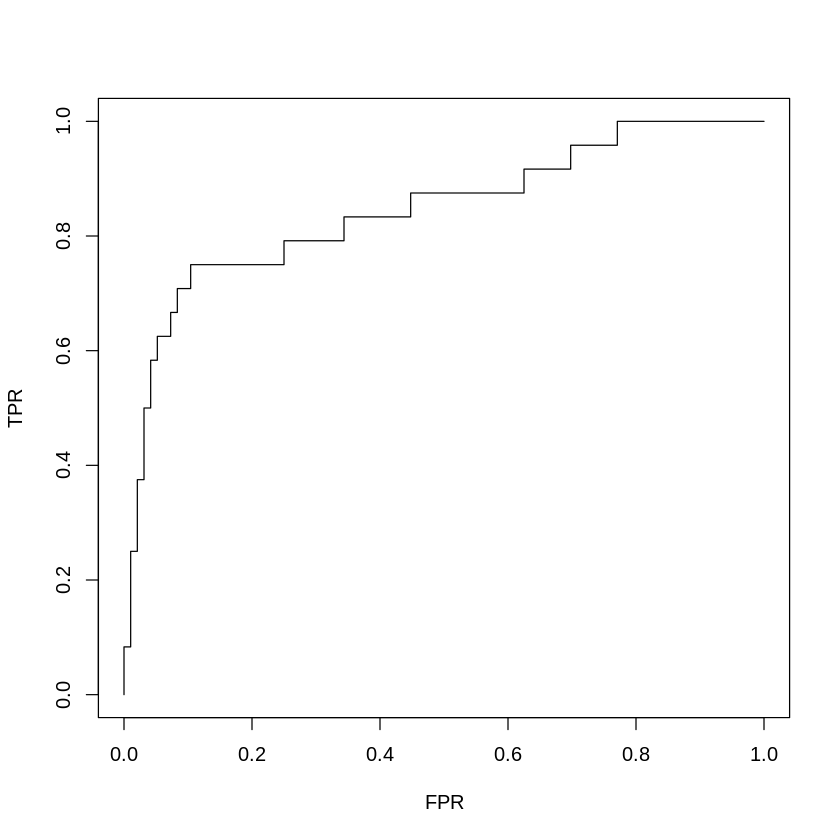

In [14]:
roc_data <- data.frame(
  FPR = 1 - roc_test$specificities,
  TPR = roc_test$sensitivities,
  threshold = roc_test$thresholds
)

plot(roc_data$FPR, roc_data$TPR, xlab="FPR", ylab="TPR", type="l")

# Calculate distance to (0,1)
roc_data$Distance <- sqrt((roc_data$FPR - 0)^2 + (roc_data$TPR - 1)^2)

# Find optimal threshold
optimal_idx <- which.min(roc_data$Distance)
optimal_threshold <- roc_data$threshold[optimal_idx]
print(optimal_threshold)

# Convert probabilities to binary
predicted_classes_test <- ifelse(predicted_probabilities_test > optimal_threshold, 1, 0)

# Create confusion matrix
conf_matrix <- table(Predicted = predicted_classes_test, Actual = test_data$Ch)
print(conf_matrix)


# Compute sensitivity
TP <- conf_matrix["1", "1"]
FN <- conf_matrix["0", "1"]
sensitivity <- TP / (TP + FN)
cat("Sensitivity: ", sensitivity)

# Predict on this years nominees

In [11]:
nominee_data <- data[(1:10),]

# Preprocess the prediction set
nominee_data <- data[1:10, ]
nominee_data$WR <- nominee_data$WR / 10
nominee_data$Ebert <- nominee_data$Ebert / 4
for (col in c("Nom", "Length", "Days")) {
  nominee_data[[col]] <- (nominee_data[[col]] - scaling_params[1]) /
                         (scaling_params[2] - scaling_params[1])
}

# Predict proabilites
predicted_probabilities <- predict(final_model, newdata = nominee_data, type = "prob")[, "Win"]

# Normalise predicted probabilities
normalised_probabilities <- predicted_probabilities / sum(predicted_probabilities)

# Print probability of winning for each nominee
for (i in 1:10) {
  print(paste(nominee_data$Name[i], ":", round(normalised_probabilities[i], 4)))
}

[1] "A Complete Unkown : 0.0058"
[1] "Anora : 0.7726"
[1] "Conclave : 0.0101"
[1] "Dune: Part Two : 9e-04"
[1] "Emilia Perez : 0.0263"
[1] "I'm Still Here : 0.0063"
[1] "Nickel Boys : 0.1251"
[1] "The Brutalist : 0.0011"
[1] "The Substance : 5e-04"
[1] "Wicked : 0.0513"
